# Imports

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error


# Data loading

In [283]:
"""
I should deffinitely drop last 2 columns, they are not useful
"""
df = pd.read_csv("AirQualityUCI.csv", sep=";", decimal=",")
df.head() 

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578,NaN,NaN
1,10/03/2004,19.00.00,2.0,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255,NaN,NaN
2,10/03/2004,20.00.00,2.2,1402,88,9.0,939,131,1140,114,1555,1074,11.9,54.0,0.7502,NaN,NaN
3,10/03/2004,21.00.00,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11.0,60.0,0.7867,NaN,NaN
4,10/03/2004,22.00.00,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,59.6,0.7888,NaN,NaN


In [284]:
df = df.drop(columns=["Unnamed: 15", "Unnamed: 16"])

In [285]:
"""
Not much object types, there are no missing values, except -200
"""
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   float64
 3   PT08.S1(CO)    9357 non-null   int64  
 4   NMHC(GT)       9357 non-null   int64  
 5   C6H6(GT)       9357 non-null   float64
 6   PT08.S2(NMHC)  9357 non-null   int64  
 7   NOx(GT)        9357 non-null   int64  
 8   PT08.S3(NOx)   9357 non-null   int64  
 9   NO2(GT)        9357 non-null   int64  
 10  PT08.S4(NO2)   9357 non-null   int64  
 11  PT08.S5(O3)    9357 non-null   int64  
 12  T              9357 non-null   float64
 13  RH             9357 non-null   float64
 14  AH             9357 non-null   float64
dtypes: float64(5), int64(8), object(2)
memory usage: 1.1+ MB


In [286]:
"""
Seems nice, but should be checked after removing -200 values
"""
df.describe() 

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,-34.207524,1048.990061,-159.090093,1.865683,894.595276,168.616971,794.990168,58.148873,1391.479641,975.072032,9.778305,39.485380,-6.837604
std,77.657170,329.832710,139.789093,41.380206,342.333252,257.433866,321.993552,126.940455,467.210125,456.938184,43.203623,51.216145,38.976670
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
25%,0.600000,921.000000,-200.000000,4.000000,711.000000,50.000000,637.000000,53.000000,1185.000000,700.000000,10.900000,34.100000,0.692300
50%,1.500000,1053.000000,-200.000000,7.900000,895.000000,141.000000,794.000000,96.000000,1446.000000,942.000000,17.200000,48.600000,0.976800
75%,2.600000,1221.000000,-200.000000,13.600000,1105.000000,284.000000,960.000000,133.000000,1662.000000,1255.000000,24.100000,61.900000,1.296200
max,11.900000,2040.000000,1189.000000,63.700000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000


# EDA

Plot for visualizing probable dependencies

In [287]:
def custom_box_plot_func(data_to_plot):
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=data_to_plot)
    plt.xticks(rotation=90)
    plt.title("Box plot for all columns")
    plt.show()

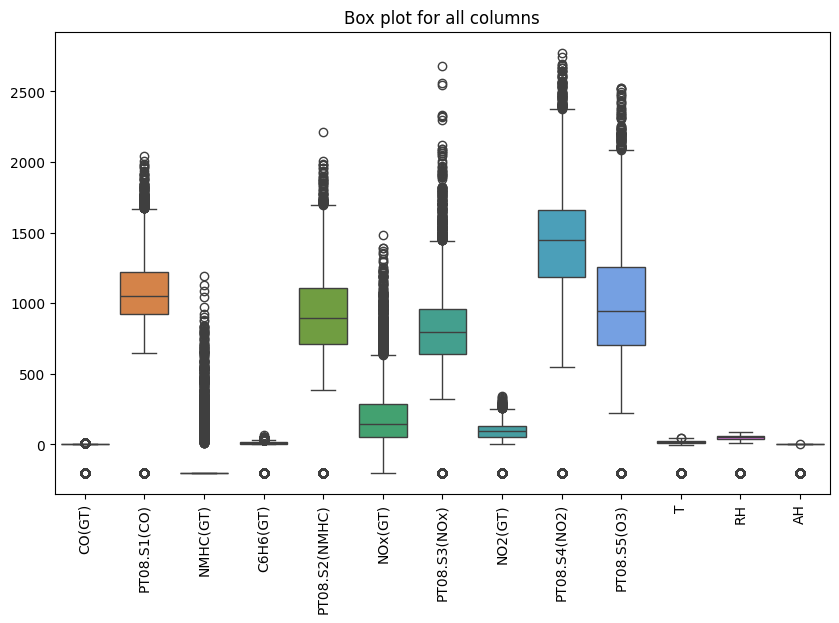

In [288]:
"""I should remove -200 values from the dataset for some features, and replace them witm mean or median for others"""
# Box plot for visualizing probable dependencies
custom_box_plot_func(df)

# Data perparation

In [289]:
"""
It is strange that data also contains -200 values for some columns, which are not mentioned in the description
For now I am going to check that cases, and decide what to do with them
"""
# Count the amount of -200 values in each column and 
for column in df.columns:
    amount = df[column].value_counts().get(-200)
    if amount is None:
        amount = 0
    print(f"{column}: {amount}, {amount / len(df) * 100}%")

Date: 24, 0.25649246553382493%
Time: 0, 0.0%
CO(GT): 1683, 17.986534145559474%
PT08.S1(CO): 366, 3.9115100993908305%
NMHC(GT): 8443, 90.23191193758683%
C6H6(GT): 366, 3.9115100993908305%
PT08.S2(NMHC): 366, 3.9115100993908305%
NOx(GT): 1639, 17.51629795874746%
PT08.S3(NOx): 366, 3.9115100993908305%
NO2(GT): 1642, 17.54835951693919%
PT08.S4(NO2): 366, 3.9115100993908305%
PT08.S5(O3): 366, 3.9115100993908305%
T: 366, 3.9115100993908305%
RH: 366, 3.9115100993908305%
AH: 366, 3.9115100993908305%


/tmp/ipykernel_16044/52069686.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  amount = df[column].value_counts().get(-200)
/tmp/ipykernel_16044/52069686.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  amount = df[column].value_counts().get(-200)


In [290]:
"""Ok, looks funny"""
# Check the date column samples with -200 values
indexes = df[df["Date"] == -200].index
nan_data_samples = df[indexes]

indexes

Index([], dtype='int64')

In [291]:
"""Ok, for now I am going to remove NMHC(GT) column, 
drop -200 from 17+% columns beacuse it's too much to replace and too small to drop whole column and target, 
and replace -200 with mean for others"""
# remove rows with -200 values in the Date column
print(f"Before removing -200 values: {len(df)}")
df = df[df["Date"] != -200]
print(f"After removing -200 values: {len(df)}")


Before removing -200 values: 9357
After removing -200 values: 9357


In [292]:
# Remove NMHC(GT) column, also i will remove Date and Time columns, because they are not useful for the model that I am going to use (Time series are futher in the course :) )
df = df.drop(columns=["NMHC(GT)"])
df = df.drop(columns=["Date", "Time"])

In [293]:
# drop -200 from CO(GT), NOx(GT), NO2(GT) and target C6H6(GT), and replace -200 with mean for others
df = df[df["CO(GT)"] != -200]
df = df[df["NOx(GT)"] != -200]
df = df[df["NO2(GT)"] != -200]
df = df[df["C6H6(GT)"] != -200]

for column in df.columns:
    if column in ["CO(GT)", "NOx(GT)", "NO2(GT)", "Date", "Time", "C6H6(GT)"]:
        continue
    df[column] = df[column].replace(-200, df[column].mean())


In [294]:
"""Nice :)"""
df.describe() 


,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,6941.000000,6941.000000,6941.000000,6941.000000,6941.000000,6941.000000,6941.000000,6941.000000,6941.000000,6941.000000,6941.000000,6941.000000
mean,2.182467,1119.913269,10.554488,958.543005,250.671949,816.893387,113.874082,1452.648898,1057.756519,17.755323,48.881905,0.985573
std,1.441158,218.733754,7.465226,264.055002,208.611371,251.897200,47.475017,353.301576,406.509957,8.844909,17.433193,0.401097
min,0.100000,647.000000,0.200000,390.000000,2.000000,322.000000,2.000000,551.000000,221.000000,-1.900000,9.200000,0.184700
25%,1.100000,956.000000,4.900000,760.000000,103.000000,642.000000,79.000000,1207.000000,760.000000,11.200000,35.300000,0.694100
50%,1.900000,1085.000000,8.800000,931.000000,186.000000,786.000000,110.000000,1457.000000,1006.000000,16.800000,49.200000,0.953900
75%,2.900000,1254.000000,14.600000,1135.000000,335.000000,947.000000,142.000000,1683.000000,1322.000000,23.700000,62.200000,1.251600
max,11.900000,2040.000000,63.700000,2214.000000,1479.000000,2683.000000,333.000000,2775.000000,2523.000000,44.600000,88.700000,2.180600


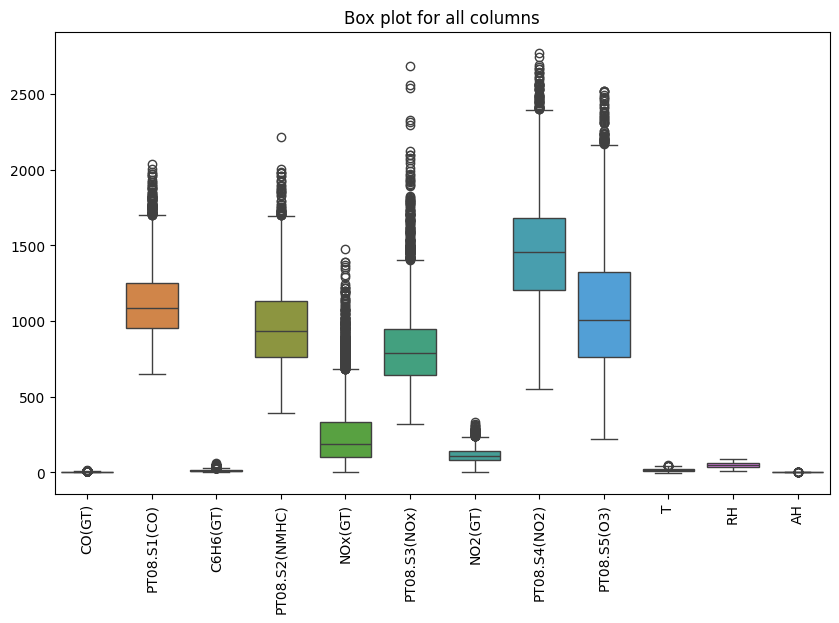

In [295]:
"""We have some features woth low variance, but I am going to keep them for now"""
# Box plot for visualizing probable dependencies
custom_box_plot_func(df)

# Feature engineering

In [296]:
# I think that i should try to use variance threshold to remove features with low variance
selector = VarianceThreshold(threshold=0.2)
df_selected = selector.fit_transform(df)
df_selected = pd.DataFrame(df, columns=df.columns[selector.get_support()])
df_selected["C6H6(GT)"] = df["C6H6(GT)"]
df_selected.head()

,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH
0,2.6,1360,11.9,1046,166,1056,113,1692,1268,13.6,48.9
1,2.0,1292,9.4,955,103,1174,92,1559,972,13.3,47.7
2,2.2,1402,9.0,939,131,1140,114,1555,1074,11.9,54.0
3,2.2,1376,9.2,948,172,1092,122,1584,1203,11.0,60.0
4,1.6,1272,6.5,836,131,1205,116,1490,1110,11.2,59.6


# Normalization and scaling

In [297]:
# Scale the data except target column

scaler = StandardScaler()
df_scaled = df_selected.copy()
df_scaled[df_scaled.columns] = scaler.fit_transform(df_scaled[df_scaled.columns])
df_scaled["C6H6(GT)"] = df_selected["C6H6(GT)"]
df_scaled.head()


,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH
0,0.289742,1.097700,11.9,0.331231,-0.405913,0.949291,-0.018413,0.677518,0.517229,-0.469832,0.001038
1,-0.126620,0.786797,9.4,-0.013419,-0.707932,1.417770,-0.460783,0.301042,-0.210973,-0.503752,-0.067801
2,0.012167,1.289728,9.0,-0.074016,-0.573701,1.282785,0.002653,0.289720,0.039961,-0.662047,0.293605
3,0.012167,1.170853,9.2,-0.039930,-0.377149,1.092217,0.171174,0.371809,0.357320,-0.763808,0.637800
4,-0.404195,0.695355,6.5,-0.464115,-0.573701,1.540845,0.044783,0.105728,0.128526,-0.741194,0.614854


# Feature engineering

In [298]:
# Nonlinear feature engineering

for column in df_scaled.columns:
    if column in ["C6H6(GT)"]:
        continue
    df_scaled[column + "_2"] = df_scaled[column] ** 2



# Baseline model

In [299]:
# Train test split
X = df_scaled.drop(columns=["C6H6(GT)"])
y = df_scaled["C6H6(GT)"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating linear regression model with grid search for hyperparameter tuning
model = LinearRegression()
parameters = {"fit_intercept": [True, False]}

grid = GridSearchCV(model, parameters, cv=5)
grid.fit(X_train, y_train)

# Best parameters
grid.best_params_

# Predictions
y_pred = grid.predict(X_test)
"""
I have chosen this metrics because they are the most common for regression problems.
MAE is the most interpretable, because it works with the same units as the target variable.
MSE is the most used, beacuse it penalizes large errors more than MAE.
RMSE is the square root of MSE, so it is also used, because it is interpretable as the same units as the target variable.
"""
# MSE, RMSE, MAE
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = np.mean(np.abs(y_test - y_pred))

"""
I consider that this metrics are nice.
"""

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")




MAE: 0.042416468502603326
MSE: 0.0031126791840373263
RMSE: 0.055791389873683254


# Plotting the predictions

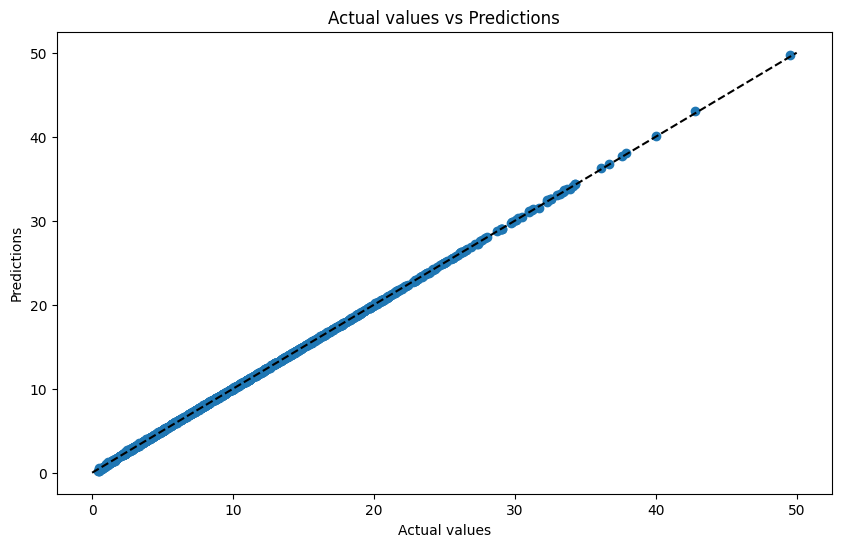

In [300]:
# Plotting actual values vs predictions as a graph
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([0, 50], [0, 50], "--k", )
plt.xlabel("Actual values")
plt.ylabel("Predictions")
plt.title("Actual values vs Predictions")
plt.show()


# Hypotheses

In [306]:
# Hypothesis testing
"""
I am going to use Pearson correlation to check if the model is statistically significant.
Null hypothesis: The model is not statistically significant.
Alternative hypothesis: The model is statistically significant.
"""

from scipy.stats import pearsonr

t_stat, p_value = pearsonr(y_test, y_pred)
print(f"t-statistic: {t_stat}")
print(f"p-value: {p_value}")

"""
I consider that this model is statistically significant, because p-value is 0 :).
"""

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")




t-statistic: 0.9999705393556417
p-value: 0.0
Reject the null hypothesis
